# Modular Exponentiation

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ModExp`
Perform $b^e \mod{m}$ for constant `base` $b$, `mod` $m$, and quantum `exponent` $e$.

Modular exponentiation is the main computational primitive for quantum factoring algorithms.
We follow [GE2019]'s "reference implementation" for factoring. See `ModExp.make_for_shor`
to set the class attributes for a factoring run.

This bloq decomposes into controlled modular exponentiation for each exponent bit.

#### Parameters
 - `base`: The integer base of the exponentiation
 - `mod`: The integer modulus
 - `exp_bitsize`: The size of the `exponent` thru-register
 - `x_bitsize`: The size of the `x` right-register 

#### Registers
 - `exponent`: The exponent
 - `x [right]`: The output register containing the result of the exponentiation 

#### References
 - [How to factor 2048 bit RSA integers in 8 hours using 20 million noisy qubits](https://arxiv.org/abs/1905.09749). Gidney and Ekerå. 2019.


In [2]:
from qualtran.bloqs.factoring.mod_exp import ModExp

### Example Instances

In [3]:
modexp_small = ModExp(base=3, mod=15, exp_bitsize=3, x_bitsize=2048)

In [4]:
modexp = ModExp.make_for_shor(big_n=15 * 17, g=9)

In [5]:
g, N, n_e, n_x = sympy.symbols('g N n_e, n_x')
modexp_symb = ModExp(base=g, mod=N, exp_bitsize=n_e, x_bitsize=n_x)

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([modexp_symb, modexp_small, modexp],
           ['`modexp_symb`', '`modexp_small`', '`modexp`'])

### Decomposition

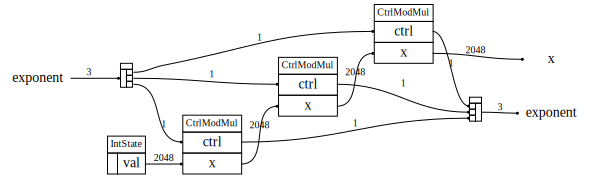

In [7]:
show_bloq(modexp_small.decompose_bloq())

### Call Graph

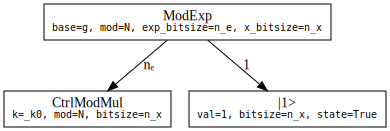

#### Counts totals:
 - `CtrlModMul`: $\displaystyle n_{e}$
 - `IntState`: 1

In [8]:
from qualtran.resource_counting.generalizers import ignore_split_join
modexp_symb_g, modexp_symb_sigma = modexp_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(modexp_symb_g)
show_counts_sigma(modexp_symb_sigma)